In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [24]:
import pandas as pd

# Specify the full path to your CSV file
file_path = r"C:\Users\laksh\OneDrive\Desktop\Cars.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to confirm the data
print(df.head())

   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


In [26]:
df.shape

(81, 5)

In [28]:
df.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [32]:
''' successfully loaded the dataset from the CSV file and performed some exploratory data analysis (EDA) using df.head(), df.shape, df.describe(), and df.info(). You now have a dataset with columns related to various car attributes like Horsepower (HP), Miles per Gallon (MPG), Volume (VOL), Speed (SP), and Weight (WT).

If you'd like to proceed further, you could perform some common machine learning tasks, such as building regression models, performing data visualization, or checking for correlations between features. Let's proceed with an example of how to perform a linear regression using this dataset.

.'''

" successfully loaded the dataset from the CSV file and performed some exploratory data analysis (EDA) using df.head(), df.shape, df.describe(), and df.info(). You now have a dataset with columns related to various car attributes like Horsepower (HP), Miles per Gallon (MPG), Volume (VOL), Speed (SP), and Weight (WT).\n\nIf you'd like to proceed further, you could perform some common machine learning tasks, such as building regression models, performing data visualization, or checking for correlations between features. Let's proceed with an example of how to perform a linear regression using this dataset.\n\n."

In [34]:
'''3. Linear Regression Example
Let's perform linear regression to predict MPG (miles per gallon) based on the features HP, VOL, SP, and WT.

Step 1: Data Preprocessing
We'll split the data into training and testing sets'''
from sklearn.model_selection import train_test_split

# Define the features (independent variables) and target (dependent variable)
X = df[['HP', 'VOL', 'SP', 'WT']]  # Independent variables
y = df['MPG']  # Dependent variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (64, 4)
Testing set shape: (17, 4)


In [35]:
'''Step 2: Train the Model
We will use StatsModels to build a linear regression model.

'''
import statsmodels.api as sm

# Add a constant column to the independent variables (X) for the intercept
X_train_const = sm.add_constant(X_train)

# Fit a linear regression model
model = sm.OLS(y_train, X_train_const).fit()

# Print the model summary
print(model.summary())
#The summary() function provides a lot of useful information, including the coefficients, R-squared value, p-values, and more.

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     50.55
Date:                Thu, 06 Feb 2025   Prob (F-statistic):           2.08e-18
Time:                        12:00:02   Log-Likelihood:                -182.24
No. Observations:                  64   AIC:                             374.5
Df Residuals:                      59   BIC:                             385.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.7257     16.319      1.086      0.2

Mean Squared Error: 31.96412148976048


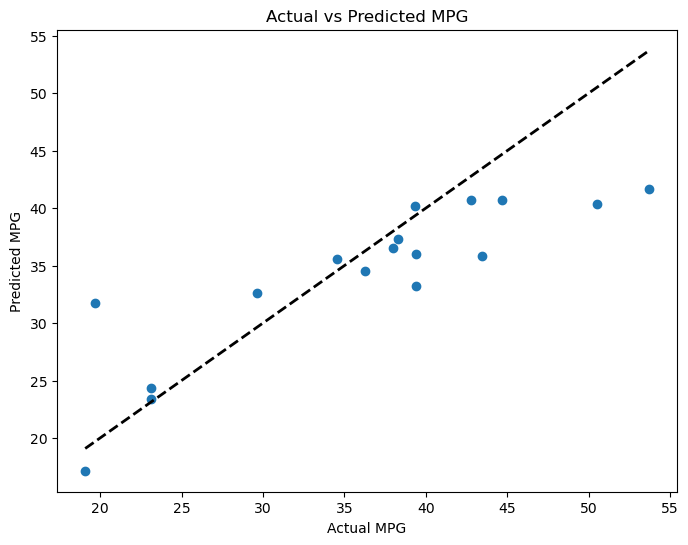

In [36]:
'''Step 3: Model Evaluation
Now, let's make predictions on the test data and evaluate the model's performance.'''
# Prepare the test data (add constant column)
X_test_const = sm.add_constant(X_test)

# Make predictions on the test set
y_pred = model.predict(X_test_const)

# Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predicted vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MPG')
plt.ylabel('Predicted MPG')
plt.title('Actual vs Predicted MPG')
plt.show()


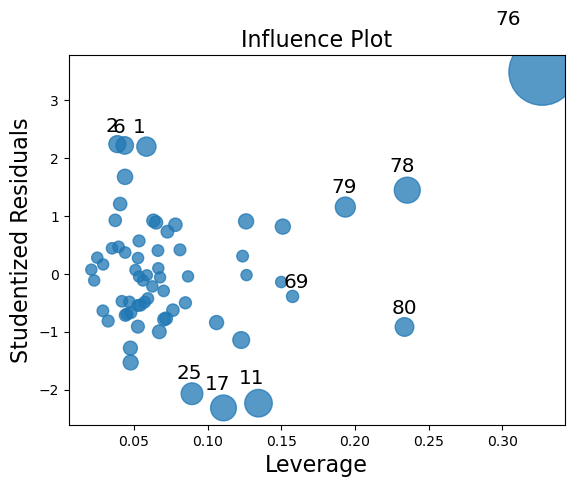

In [37]:
'''Step 4: Check for Influential Points
You can use an influence plot to identify influential points (outliers) that could have a significant effect on the model.'''
# Create an influence plot
influence_plot(model)
plt.show()


# BASIC COMMANDS

In [39]:
'''1. Checking the First Few Rows of the Dataset (head())
This gives you a glimpse of the first few rows of your dataset.'''
# Display the first few rows of the dataset
print(df.head())


   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


In [40]:
'''2. Getting Summary Statistics (describe())
The describe() function provides statistical details like mean, standard deviation, minimum, and maximum values for the numerical columns.'''
# Get summary statistics for numerical columns
print(df.describe())


               HP        MPG         VOL          SP         WT
count   81.000000  81.000000   81.000000   81.000000  81.000000
mean   117.469136  34.422076   98.765432  121.540272  32.412577
std     57.113502   9.131445   22.301497   14.181432   7.492813
min     49.000000  12.101263   50.000000   99.564907  15.712859
25%     84.000000  27.856252   89.000000  113.829145  29.591768
50%    100.000000  35.152727  101.000000  118.208698  32.734518
75%    140.000000  39.531633  113.000000  126.404312  37.392524
max    322.000000  53.700681  160.000000  169.598513  52.997752


In [41]:
'''3. Checking the Shape of the Dataset (shape)
To check the number of rows and columns in your dataset.'''
# Check the shape (number of rows and columns)
print(df.shape)


(81, 5)


In [42]:
'''4. Getting Data Types (dtypes)
To check the data types of each column in your dataset.'''
# Check the data types of each column
print(df.dtypes)


HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object


In [43]:
'''5. Checking for Missing (Null) Values (isnull())
To check if any columns have missing values.'''
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)


HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64
HP     0.0
MPG    0.0
VOL    0.0
SP     0.0
WT     0.0
dtype: float64


           HP       MPG       VOL        SP        WT
HP   1.000000 -0.725038  0.077459  0.973848  0.076513
MPG -0.725038  1.000000 -0.529057 -0.687125 -0.526759
VOL  0.077459 -0.529057  1.000000  0.102170  0.999203
SP   0.973848 -0.687125  0.102170  1.000000  0.102439
WT   0.076513 -0.526759  0.999203  0.102439  1.000000


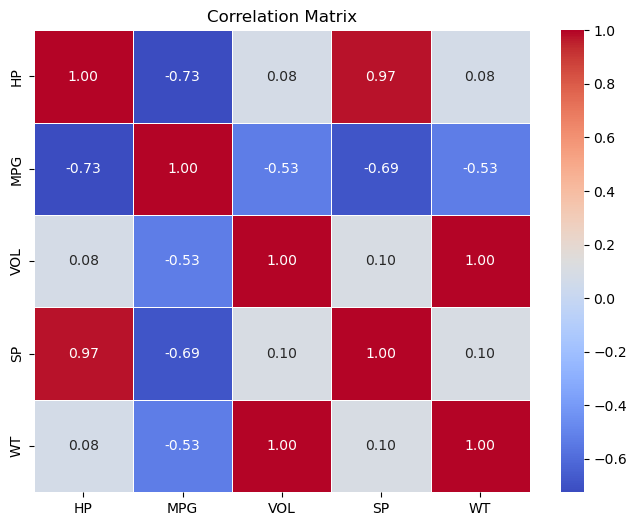

In [44]:
'''6. Checking Correlations (corr())
To see the correlation between the numerical features.'''
# Compute and display the correlation matrix
correlation_matrix = df.corr()
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [45]:
'''7. Checking for Duplicates (duplicated())
To check if your dataset has any duplicate rows.'''
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [46]:
'''8. Getting Basic Info (info())
To see a concise summary of the dataset including the number of non-null entries, column data types, and memory usage.'''
# Display info about the dataset
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB
None


In [47]:
'''9. Value Counts (value_counts())
To check the frequency of unique values in a specific column (useful for categorical variables).


'''
# Example: Check the unique values in the 'VOL' column (Volume)
print(df['VOL'].value_counts())


VOL
50     9
92     8
89     7
101    7
99     4
113    4
107    3
86     3
103    2
88     2
129    2
123    2
115    2
111    2
94     2
124    2
114    2
91     2
98     1
121    1
117    1
160    1
132    1
135    1
112    1
127    1
104    1
131    1
116    1
96     1
97     1
102    1
106    1
119    1
Name: count, dtype: int64


In [48]:
#Build model
import statsmodels.formula.api as smf
model=smf.ols('MPG~WT+VOL+SP+HP', data=df).fit()

In [49]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [51]:
#R squared values
'''R² (should be more) tells you how well the model fits the data. the distance between actual and predicted value. adj r2 should be more
Adjusted R² tells you how well the model fits the data, while also considering the number of predictors, helping to avoid overfitting.'''
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [52]:
#in 3rd program we took all features
#now we'll take only one feature,it is linear regression
ml_v=smf.ols('MPG~VOL',data=df).fit()
#t and p values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [53]:
# colleniarity: if 2 features are more depending on each other. we can delete one feature. beacuse if we have many features it will impact model.so less features are better. If we have collinearity in our data, it reduces the model complexity by removing few features.
#how can we remove feature; 


In [54]:
#Calculating VIF
rsq_hp=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)
rsq_wt=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_wt=1/(1-rsq_wt)
rsq_sp=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_sp=1/(1-rsq_sp)
rsq_vol=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_vol=1/(1-rsq_vol)

d1={'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,19.926589
2,VOL,19.926589
3,SP,19.926589


In [55]:
rsq_hp=smf.ols('HP~WT+VOL+SP',data=df).fit().rsquared
vif_hp=1/(1-rsq_hp)

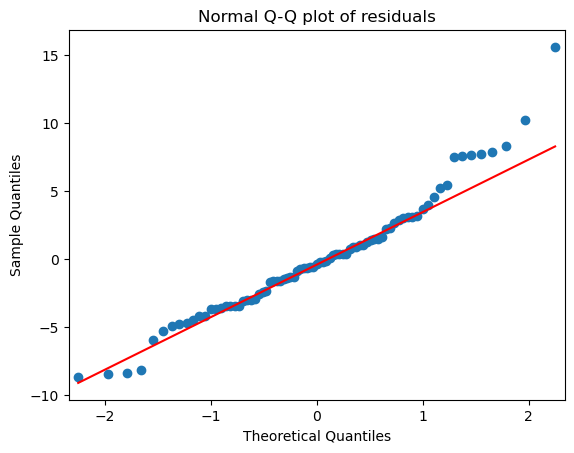

In [80]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [93]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()

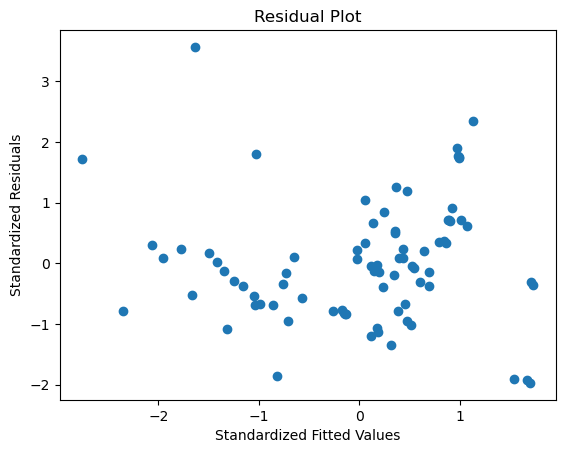

In [95]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

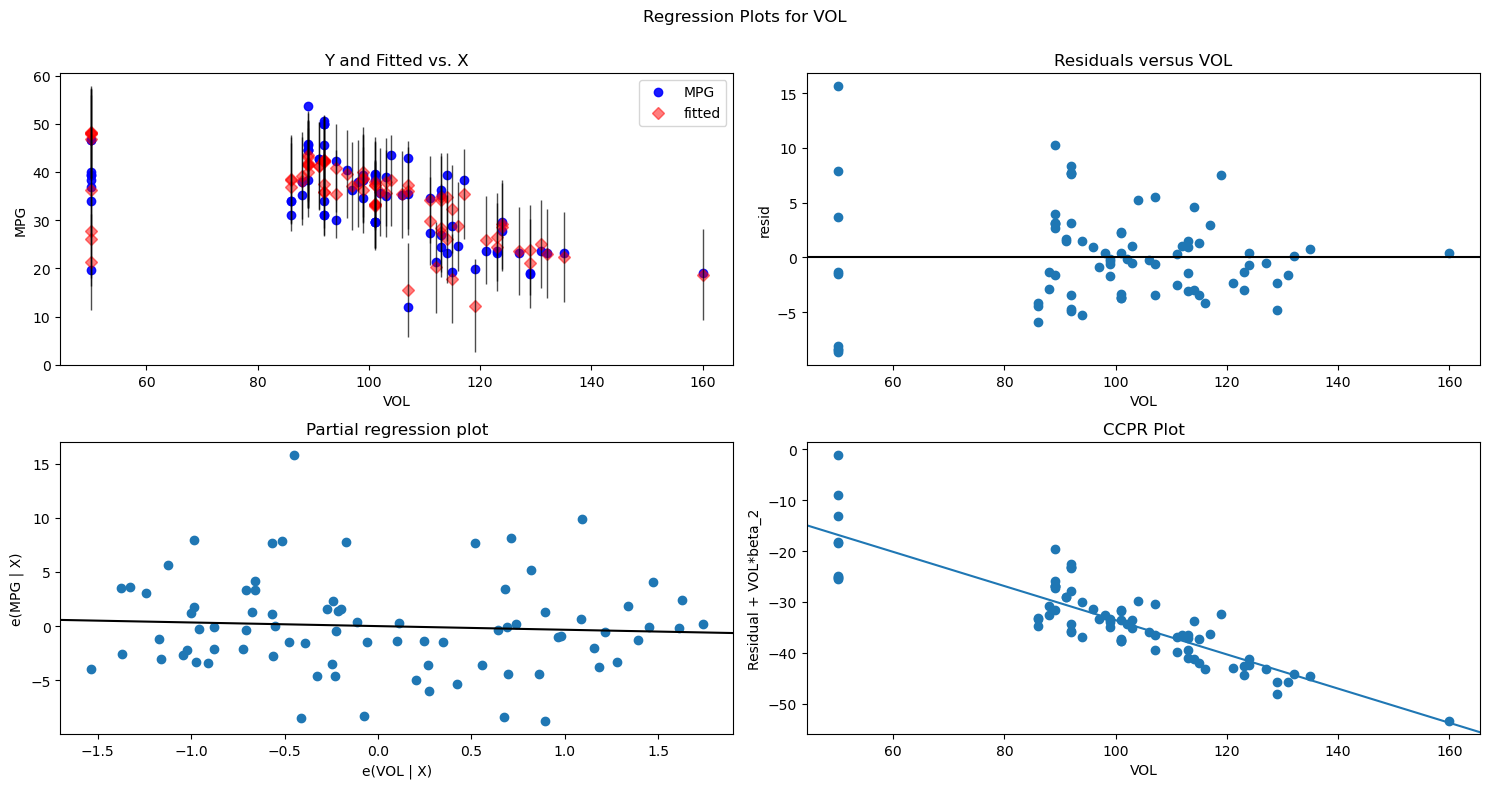

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

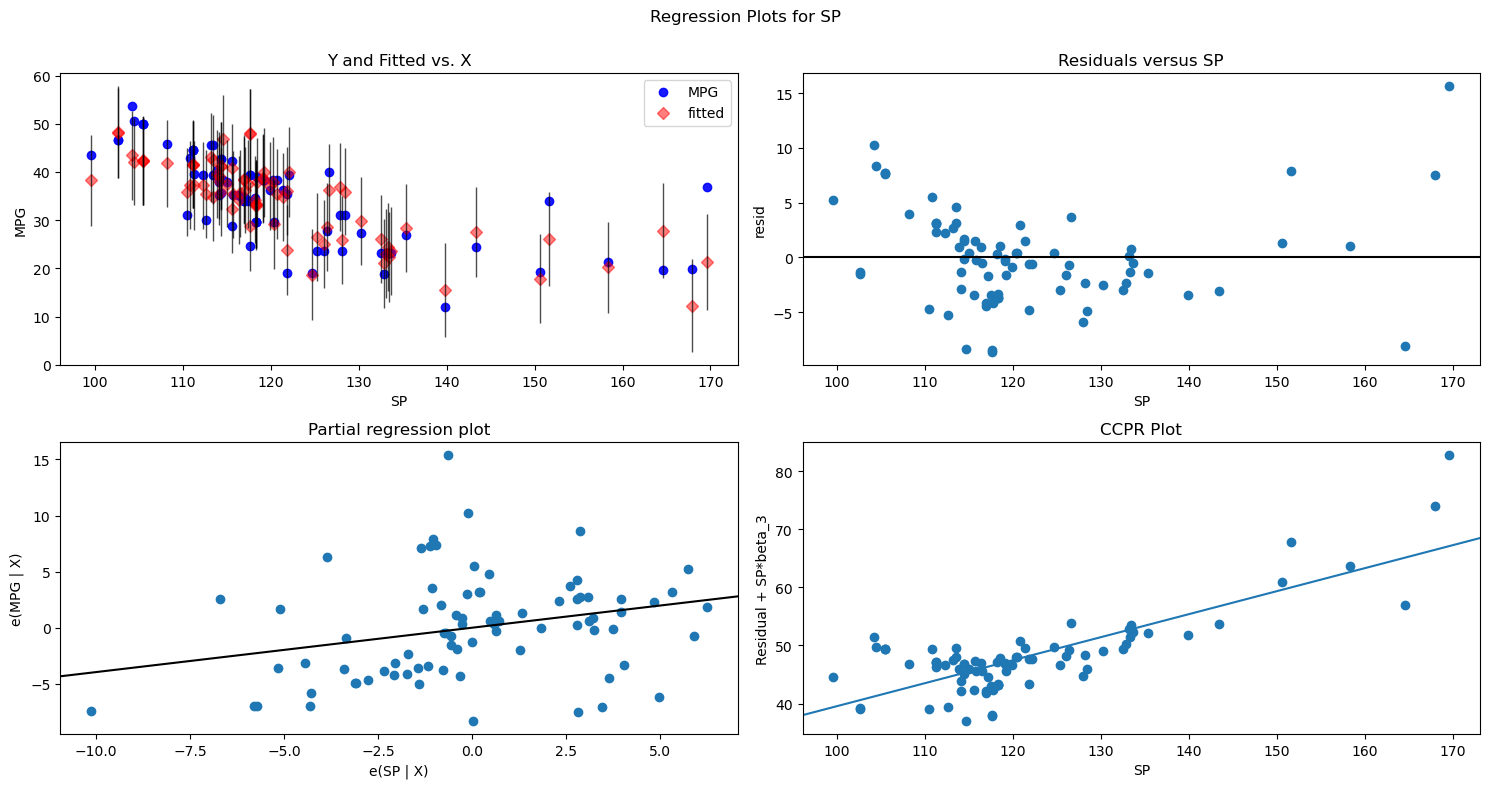

In [99]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

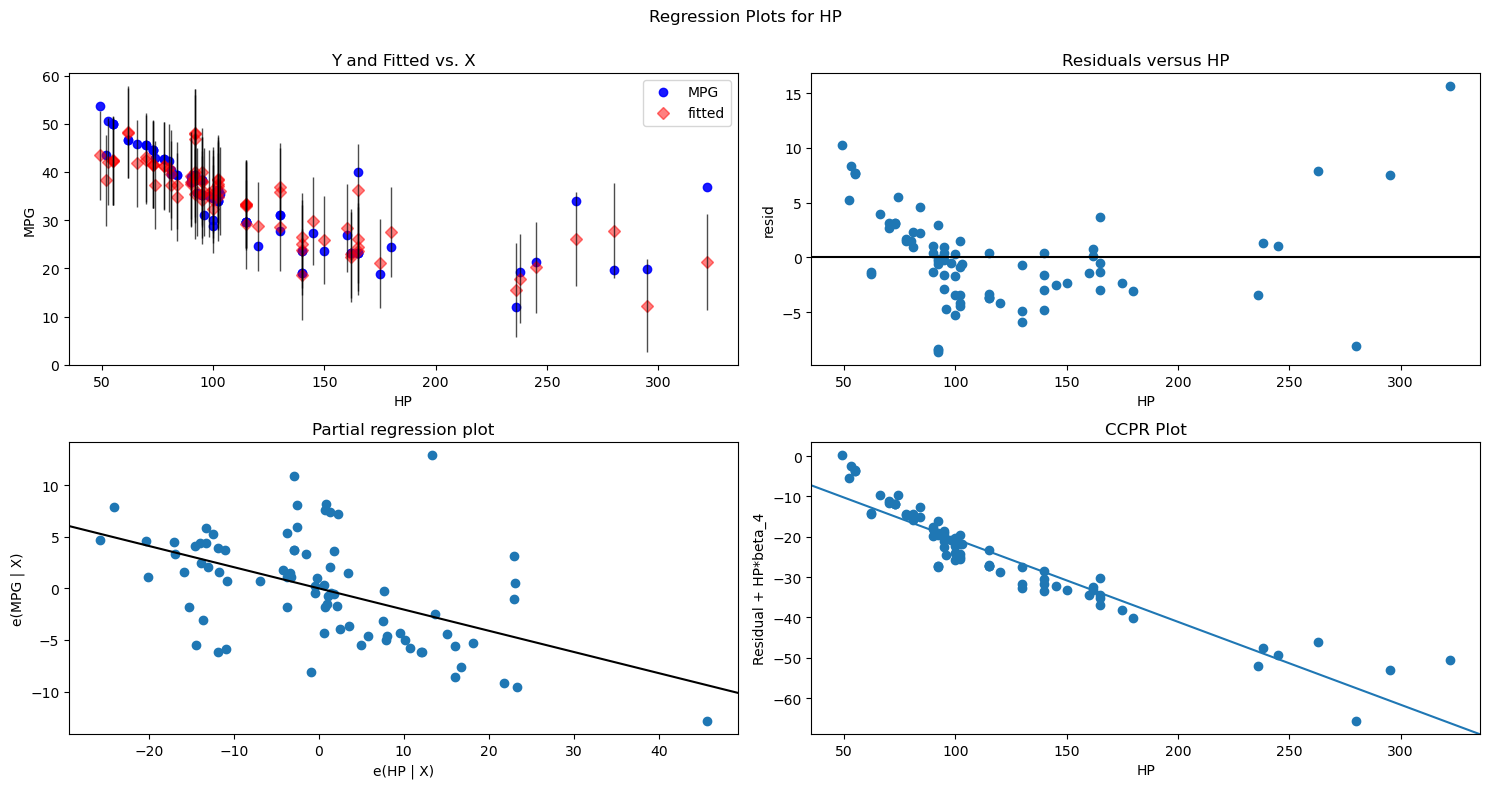

In [101]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

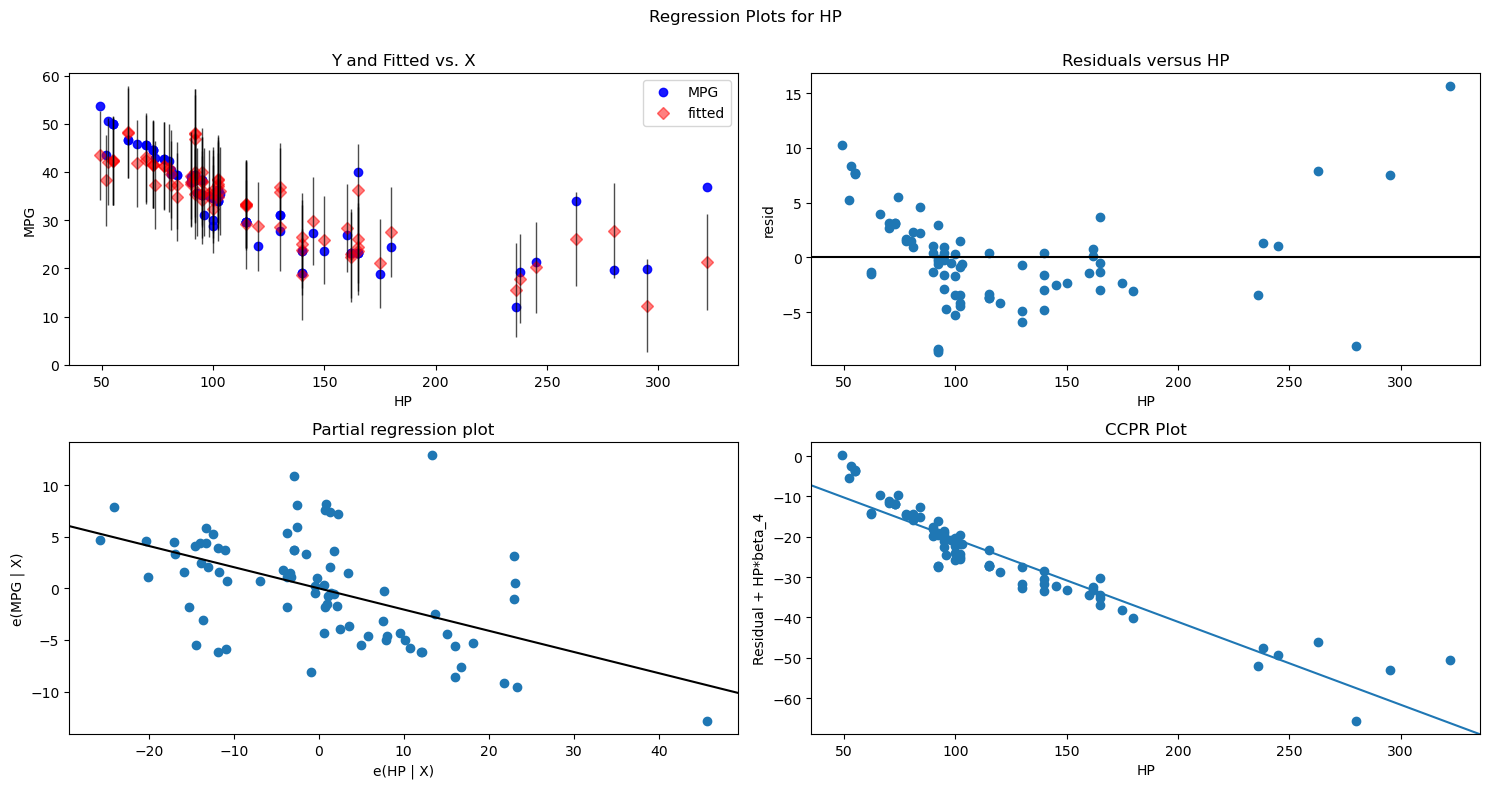

In [103]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

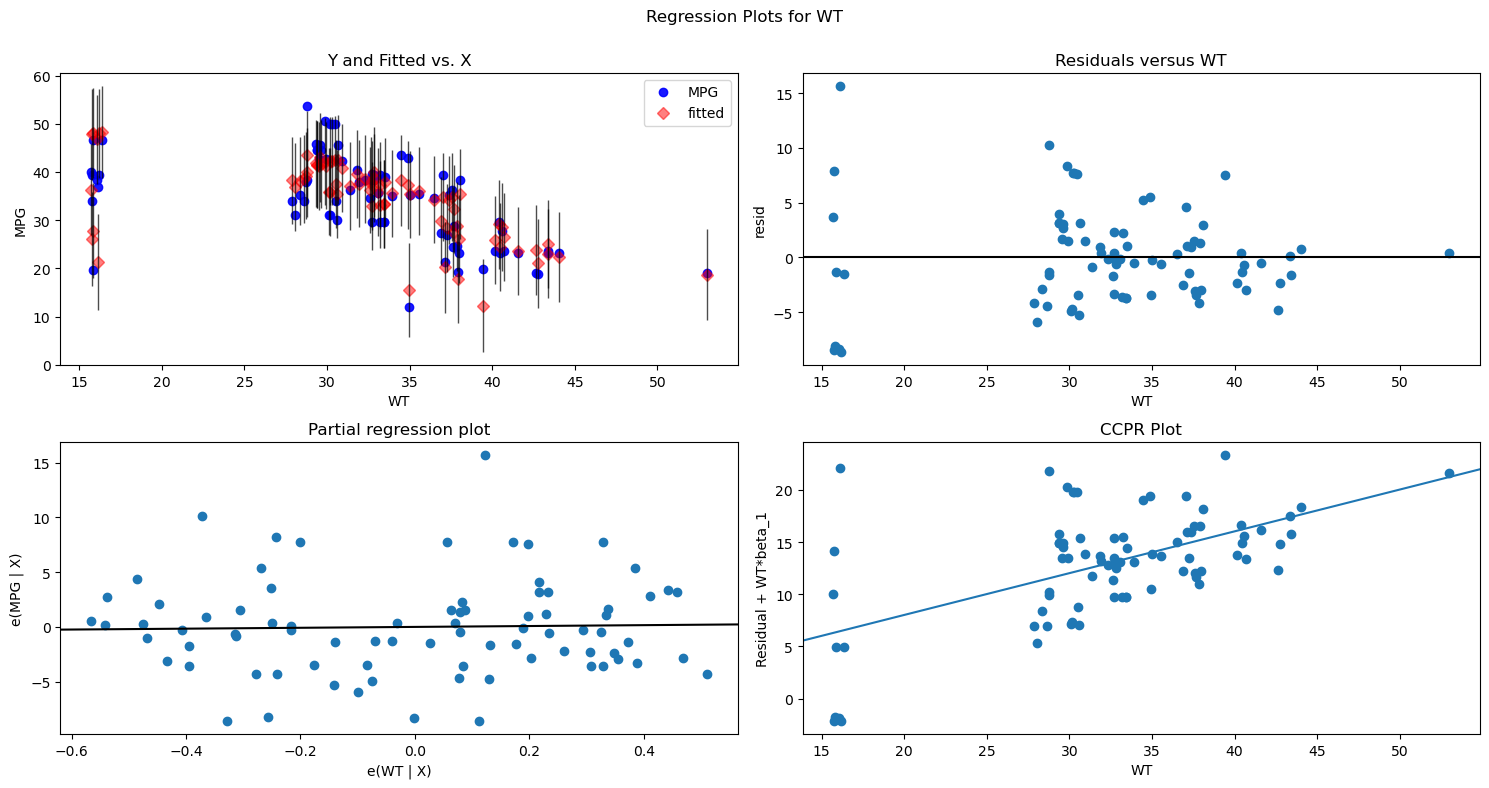

In [105]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

In [107]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

NameError: name 'Cars' is not defined

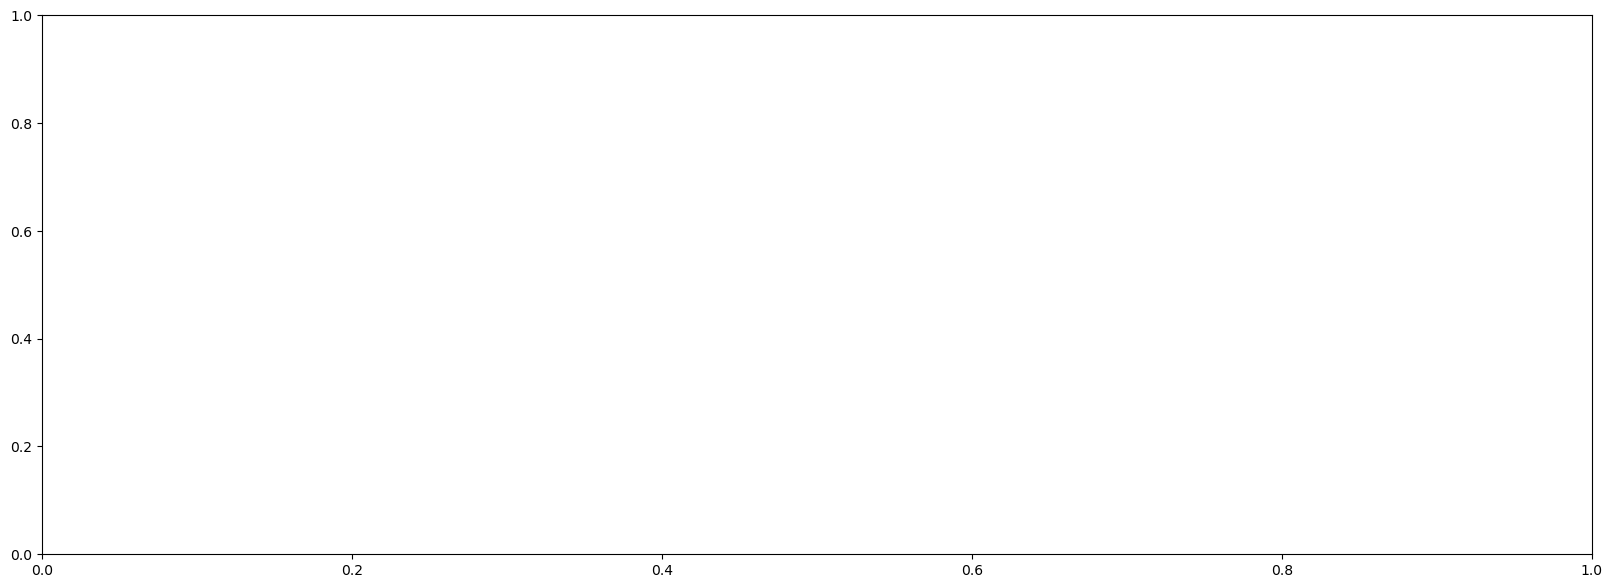

In [109]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Cars)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [111]:
(np.argmax(c), np.max(c))

(76, 1.0865193998179556)

In [113]:
Cars.head()

NameError: name 'Cars' is not defined

In [115]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = Cars).fit()

NameError: name 'Cars' is not defined

In [117]:
(final_ml_V.rsquared,final_ml_V.aic)

NameError: name 'final_ml_V' is not defined